In [2]:
# from IPython.display import Image
from PIL import Image
import pandas as pd

# Metrics for classification

## 1. Accuracy

$$
Accuracy = \frac{1}{N} \sum_{i=1}^N [\hat y_i = y_i]
$$

- best constant : the most frequent class

- 데이터 : 10 cats, 90 dogs 일 때, 다 dog로 예측하면, accuracy = 0.9 
    - accuracy만 보면 좋은 모델 같지만, 사실은 하나의 class로만 예측한 것. 이럴 때에는 accuracy를 해석하는 데에 주의해야함

- 단점 
    - 되게 직관적인 metric이지만, 최적화 하기에 어렵다.

    - hard prediction이기 때문에, probability를 모른다.
    
## 2. Logarithmic loss(log loss)
probability를 return -> soft prediction

- binary : 
$$
LogLoss = -\frac{1}{N} \sum_{i=1}^N [y_ilog(\hat y_i) + (1-y_i)log(1-\hat y_i)]
$$

- multiclass : 
$$
LogLoss = -\frac{1}{N} \sum_{i=1}^N\sum_{i=1}^L y_{il}log(\hat y_{il})
$$
$$
where L = # of class
$$

- In practice
$$
LogLoss = -\frac{1}{N} \sum_{i=1}^N\sum_{i=1}^L y_{il}log(min(max(\hat y_{il},10^{-15}), 1-10^{-15})) 
$$

- 예측이 완전히 틀린 경우에 엄청난 cost를 준다.(큰 실수보다는 작은 실수를 선호함)

#### best constant 
- 각 class의 frequency
    - 예를들어, 10 cats, 90 dogs 이면, [0.1, 0.9] 이렇게 
    - 미분해서 풀어보면 나옴

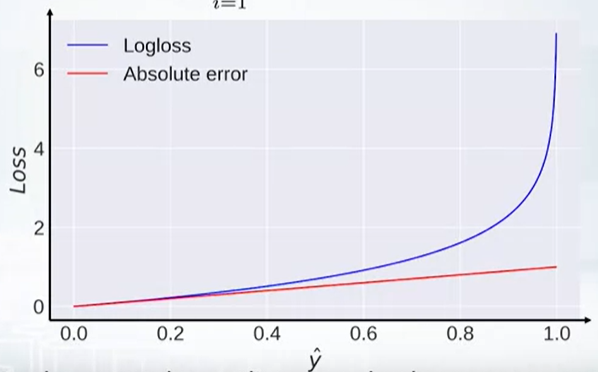

In [2]:
Image.open('img6.png')

## 3. Area Under Curve (AUC ROC)
### 등장 컨셉
accuracy는 soft prediction한 후에 threshold를 정해서 T / F를 정하게 되는데, 

아래 그림을 보면 threshold가 0.5 / 0.7 두 경우의 accuracy가 다름.

이런 경우를 피하기 위한 것이 auc

- class label imbalance가 심한 데이터에서 사용.

- 내가 이해한 것은 저 threshold가 변해도 accuracy가 많이 변하지 않는다면, auc가 클 것.

- binary classification에서만 사용 가능

https://nittaku.tistory.com/297

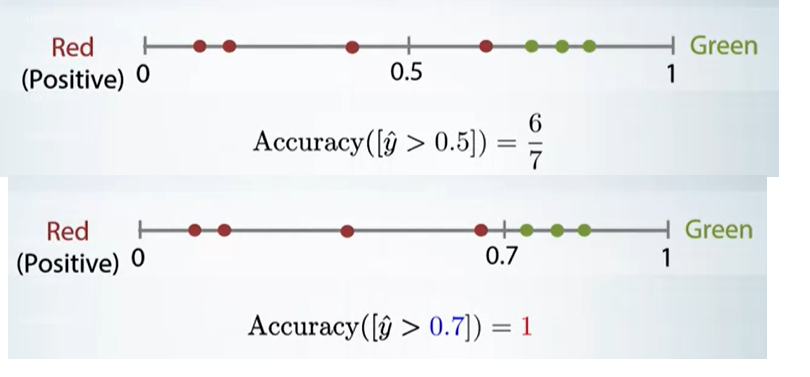

In [5]:
Image.open('img7.png')

auc is a probability that score for the green one will be higher than the score for the red one

## 4. Cohen's Kappa

$$
Kappa = 1-\frac{1 - accuracy}{1-p_e} = 1 - \frac{error}{baseline~error}
$$

$$
p_e = baseline ~ accuracy
$$

### 기본 컨셉
- auc는 0.5라는 baseline 이 있었음.
- accuracy에는 그런 것이 없음. 그래서 baseline accuracy에 비해서 어느 정도 인지 보여주는 metric
    - MSE와 R-squared와의 관계와 유사함

- baseline accuracy pe를 구하는 법(정석)
    - prediction을 만들고, shuffle 한 후에 accuracy를 계산한다
    - 이것을 반복하여 시행한 후, average를 구한다.
    
- baseline accuracy pe를 구하는 법(in practice)
    - prediction을 만들고, empirical prediction frequency 구함
    - 실제 label frequency와 weighted mean.
        - 예를 들면, 
            - 실제 cat : 0.9, dog : 0.1
            - 예측 cat : 0.8, dog : 0.2
            - then (0.9 x 0.8) + (0.1 x 0.2) = 0.74 => 이게 baseline accuracy

## 4-1. Weighted Cohen's Kappa
$$
Weighted~Kappa = 1-\frac{1 - weighted~accuracy}{1-p_e} = 1 - \frac{weighte~error}{weighted~baseline~error}
$$

$$
p_e = weighted~baseline~ accuracy
$$

### 그냥 Kappa와 다른점
- 다 같은데, accuracy를 계산하는 것이 weighted accuracy이다.
- 아래 그림처럼 weighted error를 만든다. const는 신경안써도 됨.

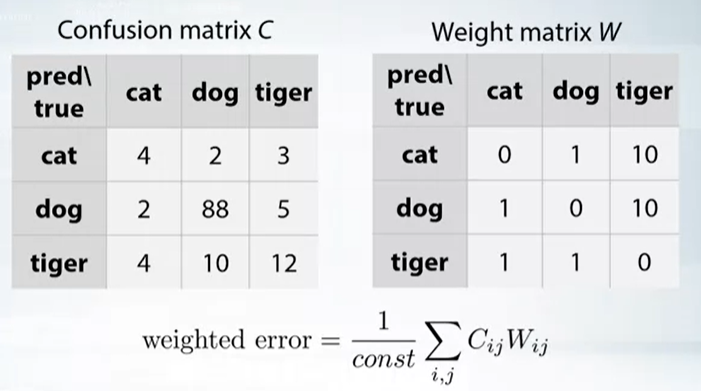

In [8]:
Image.open('img8.png')

## 4-2. Linear/Quadratic weighted Kaapa
- 이 두가지 weight matrix를 많이 사용함.
- classification task with ordered label 에 많이 쓰임
    - 예를 들면, 병이 얼마나 심각한지 1~5까지의 단계로 나눈 task.

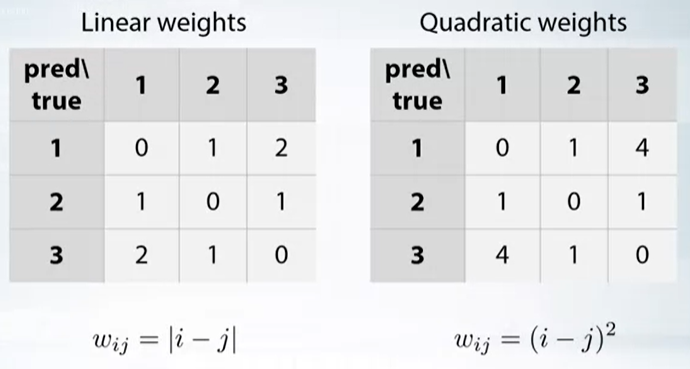

In [10]:
Image.open('img9.png')